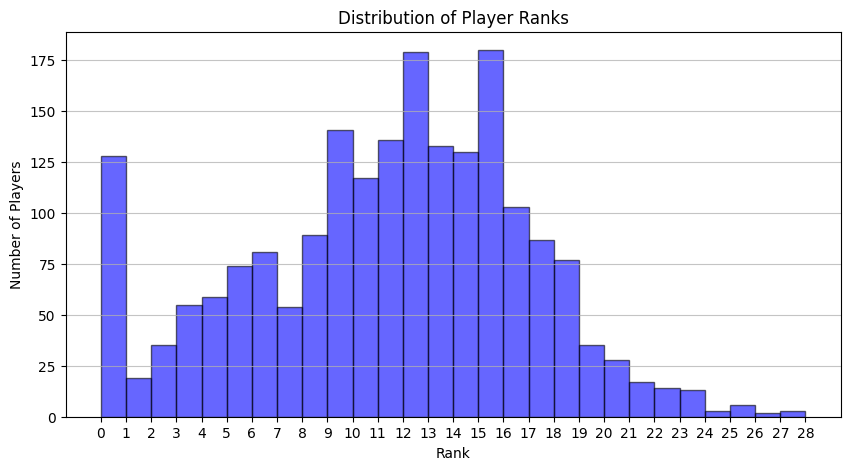

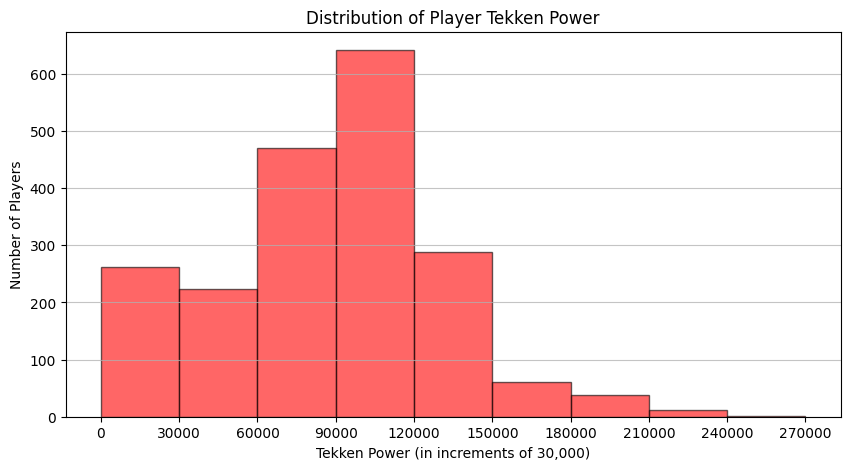

In [40]:
import json
import matplotlib.pyplot as plt
import os
from collections import Counter, defaultdict



json_file = '/59381_2.json'

#file_path = os.path.join(directory, json_file)

with open(json_file, 'r') as file:
   replay_data = json.load(file)



ranks = []
tekken_powers = []

# Dictionaries for stage and character names
stage_dict = {
    100: 'Arena',
    101: 'Arena Underground',
    200: 'Urban Square',
    201: 'Urban Square Evening',
    300: 'Yakushima',
    400: 'Coliseum of Fate',
    500: 'Rebel Hangar',
    700: 'Fallen Destiny',
    900: 'Descent into Subconscious',
    1000: 'Sanctum',
    1100: 'Into the Stratosphere',
    1200: 'Ortiz Farm',
    1300: 'Celebration On The Seine',
    1400: 'Secluded Training Ground',
    1500: 'Elegant Palace',
    1600: 'Midnight Siege',
}

char_dict = {
    0: 'Paul',
    1: 'Law',
    2: 'King',
    3: 'Yoshimitsu',
    4: 'Hwoarang',
    5: 'Xiaoyu',
    6: 'Jin',
    7: 'Bryan',
    8: 'Kazuya',
    9: 'Steve',
    10: 'Jack-8',
    11: 'Asuka',
    12: 'Devil Jin',
    13: 'Feng',
    14: 'Lili',
    15: 'Dragunov',
    16: 'Leo',
    17: 'Lars',
    18: 'Alisa',
    19: 'Claudio',
    20: 'Shaheen',
    21: 'Nina',
    22: 'Lee',
    23: 'Kuma',
    24: 'Panda',
    28: 'Zafina',
    29: 'Leroy',
    32: 'Jun',
    33: 'Reina',
    34: 'Azucena',
    35: 'Victor',
    36: 'Raven',
    38: 'Eddy',
    39: 'Lidia',
}


for replay in replay_data["replayDetailList"]:
    ranks.append(replay["1pRank"])
    ranks.append(replay["2pRank"])
    tekken_powers.append(replay["1pTekkenPower"])
    tekken_powers.append(replay["2pTekkenPower"])

plt.figure(figsize=(10, 5))
plt.hist(ranks, bins=range(min(ranks), max(ranks) + 1), color='b', alpha=0.6, edgecolor='black')
plt.xticks(range(min(ranks), max(ranks) + 1))
plt.xlabel('Rank')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ranks')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(tekken_powers, bins=range(min(tekken_powers), max(tekken_powers) + 30000, 30000), color='r', alpha=0.6, edgecolor='black')
plt.xticks(range(min(tekken_powers), max(tekken_powers) + 30000, 30000))  # Adjust x-ticks for clarity
plt.xlabel('Tekken Power (in increments of 30,000)')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Tekken Power')
plt.grid(axis='y', alpha=0.75)
plt.show()


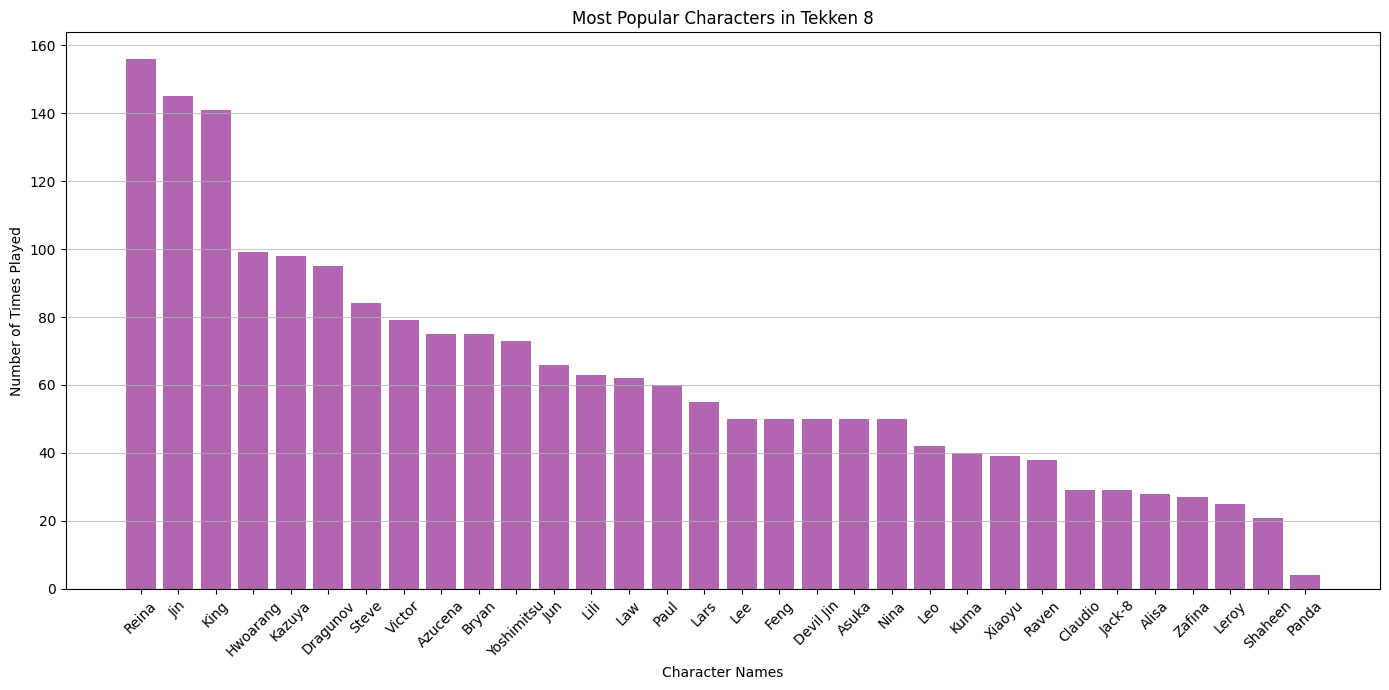

In [41]:
character_ids = []

for replay in replay_data["replayDetailList"]:
    for char_id_key in ['1pCharaId', '2pCharaId']:
        char_id = replay[char_id_key]
        if char_id.startswith('chr_'):
            char_number = int(char_id.split('_')[1])
            character_ids.append(char_number)

character_counts = Counter(character_ids)

characters = list(character_counts.keys())
counts = list(character_counts.values())

character_names = [char_dict.get(char_id, "Unknown") for char_id in characters]

sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
sorted_character_names = [character_names[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

plt.figure(figsize=(14, 7))
plt.bar(sorted_character_names, sorted_counts, color='purple', alpha=0.6)
plt.xlabel('Character Names')
plt.ylabel('Number of Times Played')
plt.title('Most Popular Characters in Tekken 8')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

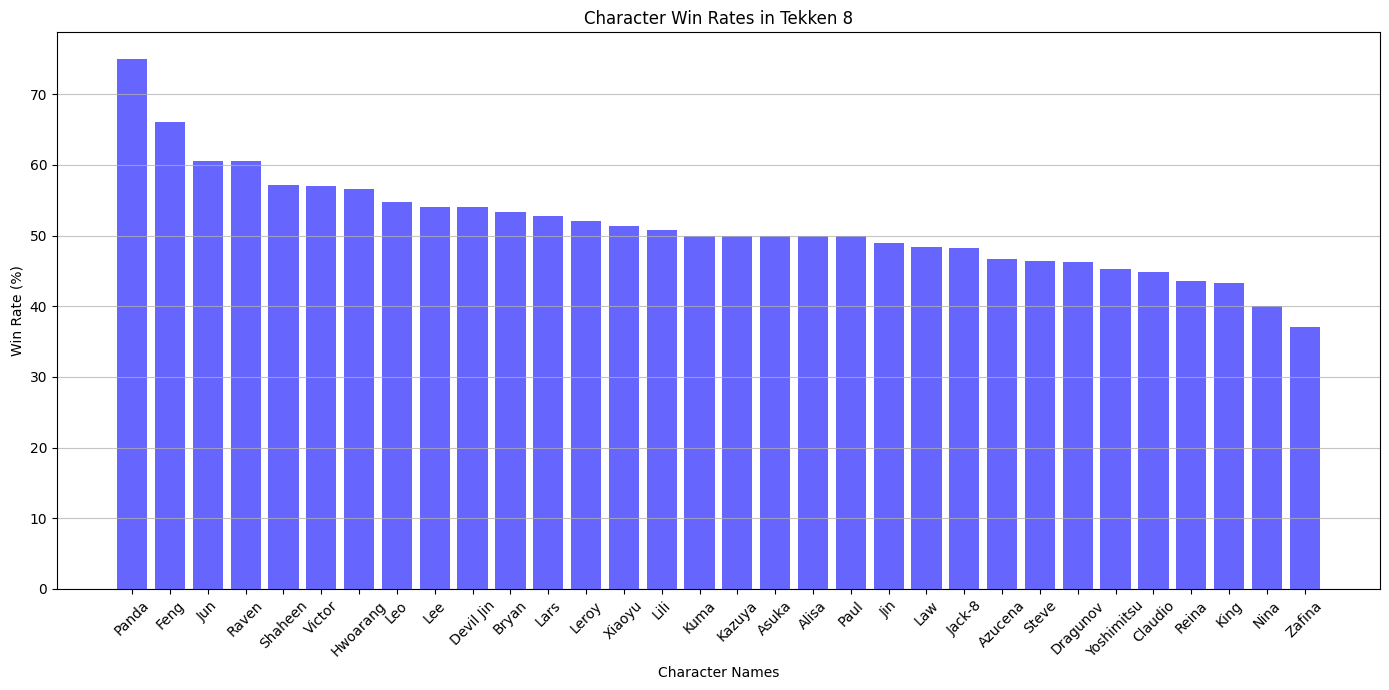

In [42]:
win_counts = {}
match_counts = {}

for replay in replay_data["replayDetailList"]:
    # Player 1 data
    player1_id = int(replay["1pCharaId"].split('_')[1])
    player1_win = replay["winResult"] == 1

    if player1_id in win_counts:
        win_counts[player1_id] += player1_win
        match_counts[player1_id] += 1
    else:
        win_counts[player1_id] = player1_win
        match_counts[player1_id] = 1

    player2_id = int(replay["2pCharaId"].split('_')[1])
    player2_win = replay["winResult"] == 2

    if player2_id in win_counts:
        win_counts[player2_id] += player2_win
        match_counts[player2_id] += 1
    else:
        win_counts[player2_id] = player2_win
        match_counts[player2_id] = 1

win_rates = {}
for char_id in match_counts:
    win_rates[char_id] = (win_counts[char_id] / match_counts[char_id]) * 100 if match_counts[char_id] > 0 else 0

sorted_indices = sorted(win_rates.keys(), key=lambda char_id: win_rates[char_id], reverse=True)
sorted_character_names = [char_dict.get(char_id, "Unknown") for char_id in sorted_indices]
sorted_win_rates = [win_rates[char_id] for char_id in sorted_indices]

plt.figure(figsize=(14, 7))
plt.bar(sorted_character_names, sorted_win_rates, color='blue', alpha=0.6)
plt.xlabel('Character Names')
plt.ylabel('Win Rate (%)')
plt.title('Character Win Rates in Tekken 8')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [43]:
# Initialize lists for ranks and Tekken powers
ranks = []
tekken_powers = []

# Initialize dictionaries to track wins, losses, and games played per character
win_counts = defaultdict(int)
loss_counts = defaultdict(int)
game_counts = defaultdict(int)

# Process each match in replay_data["replayDetailList"]
for replay in replay_data["replayDetailList"]:
    char1, char2 = replay['1pCharaId'], replay['2pCharaId']
    rounds_1p, rounds_2p = replay['1pWinRoundNum'], replay['2pWinRoundNum']
    total_rounds = replay['totalRoundNum']

    # Collect ranks and Tekken powers
    ranks.append(replay["1pRank"])
    ranks.append(replay["2pRank"])
    tekken_powers.append(replay["1pTekkenPower"])
    tekken_powers.append(replay["2pTekkenPower"])

    # Update games played for each character
    game_counts[char1] += 1
    game_counts[char2] += 1

    # Update win/loss counts
    if rounds_1p > rounds_2p:
        win_counts[char1] += 1
        loss_counts[char2] += 1
    else:
        win_counts[char2] += 1
        loss_counts[char1] += 1

# Function to calculate win rate for a character
def calculate_win_rate(character_id):
    games = game_counts[character_id]
    if games == 0:
        return 0  # No games played
    wins = win_counts[character_id]
    return wins / games

# Function to compare win rates of input character to all others
def compare_win_rate(character_id):
    target_rate = calculate_win_rate(character_id)
    print(f"Win rate for {character_id}: {target_rate:.2%}")

    for char, games in game_counts.items():
        if char != character_id:
            rate = calculate_win_rate(char)
            print(f"Compared to {char}: {rate:.2%}")

# Example usage
compare_win_rate("chr_0010")

# Print collected ranks and Tekken powers
print("Ranks:", ranks)
print("Tekken Powers:", tekken_powers)

Win rate for chr_0010: 48.28%
Compared to chr_0002: 43.26%
Compared to chr_0033: 43.59%
Compared to chr_0014: 50.79%
Compared to chr_0034: 46.67%
Compared to chr_0022: 54.00%
Compared to chr_0001: 48.39%
Compared to chr_0023: 50.00%
Compared to chr_0008: 50.00%
Compared to chr_0017: 52.73%
Compared to chr_0003: 45.21%
Compared to chr_0013: 66.00%
Compared to chr_0007: 53.33%
Compared to chr_0006: 48.97%
Compared to chr_0012: 54.00%
Compared to chr_0020: 57.14%
Compared to chr_0035: 56.96%
Compared to chr_0009: 46.43%
Compared to chr_0004: 56.57%
Compared to chr_0015: 46.32%
Compared to chr_0011: 50.00%
Compared to chr_0018: 50.00%
Compared to chr_0021: 40.00%
Compared to chr_0000: 50.00%
Compared to chr_0036: 60.53%
Compared to chr_0028: 37.04%
Compared to chr_0016: 54.76%
Compared to chr_0019: 44.83%
Compared to chr_0005: 51.28%
Compared to chr_0032: 60.61%
Compared to chr_0029: 52.00%
Compared to chr_0024: 75.00%
Ranks: [0, 9, 13, 11, 19, 17, 3, 5, 0, 0, 15, 16, 17, 19, 10, 12, 17, 1

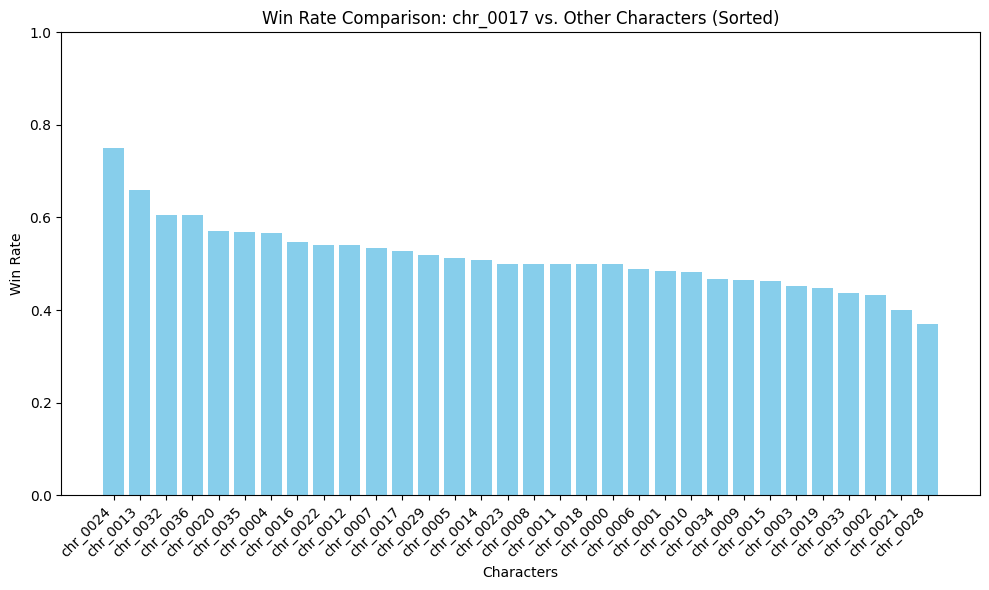

In [44]:
win_counts = defaultdict(int)
loss_counts = defaultdict(int)
game_counts = defaultdict(int)

for replay in replay_data["replayDetailList"]:
    char1, char2 = replay['1pCharaId'], replay['2pCharaId']
    rounds_1p, rounds_2p = replay['1pWinRoundNum'], replay['2pWinRoundNum']
    total_rounds = replay['totalRoundNum']

    ranks.append(replay["1pRank"])
    ranks.append(replay["2pRank"])
    tekken_powers.append(replay["1pTekkenPower"])
    tekken_powers.append(replay["2pTekkenPower"])

    game_counts[char1] += 1
    game_counts[char2] += 1

    if rounds_1p > rounds_2p:
        win_counts[char1] += 1
        loss_counts[char2] += 1
    else:
        win_counts[char2] += 1
        loss_counts[char1] += 1

def calculate_win_rate(character_id):
    games = game_counts[character_id]
    if games == 0:
        return 0
    wins = win_counts[character_id]
    return wins / games


def plot_win_rate_comparison(character_id):
    win_rates = {char: calculate_win_rate(char) for char in game_counts}

    sorted_characters = sorted(win_rates, key=win_rates.get, reverse=True)
    sorted_win_rates = [win_rates[char] for char in sorted_characters]

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_characters, sorted_win_rates, color='skyblue')
    plt.xlabel("Characters")
    plt.ylabel("Win Rate")
    plt.title(f"Win Rate Comparison: {character_id} vs. Other Characters (Sorted)")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

plot_win_rate_comparison("chr_0017")

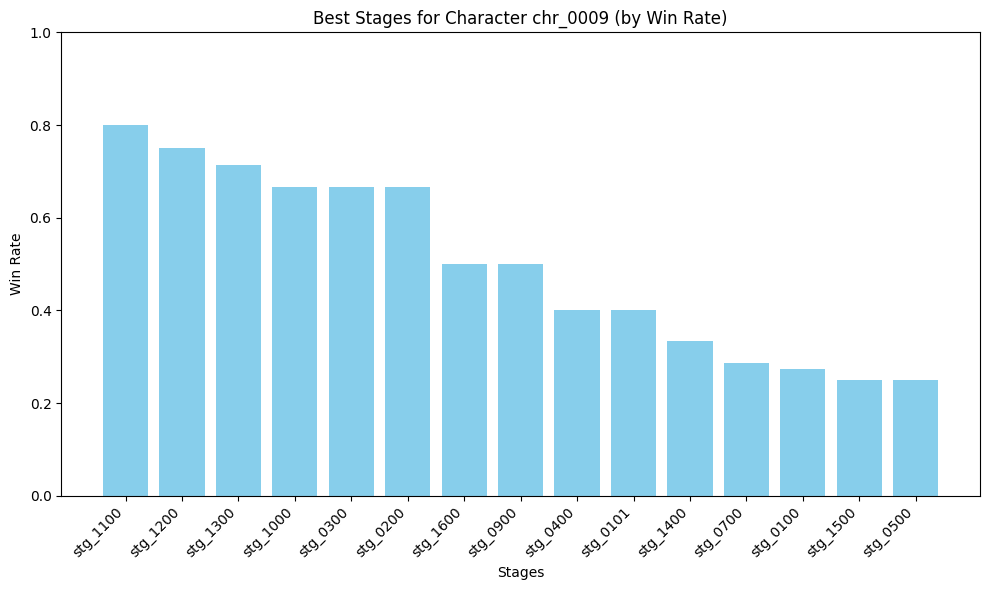

In [45]:
character_stage_wins = defaultdict(lambda: defaultdict(int))
character_stage_games = defaultdict(lambda: defaultdict(int))

for replay in replay_data["replayDetailList"]:
    char1, char2 = replay['1pCharaId'], replay['2pCharaId']
    stage_id = replay['stageId']
    rounds_1p, rounds_2p = replay['1pWinRoundNum'], replay['2pWinRoundNum']

    character_stage_games[char1][stage_id] += 1
    character_stage_games[char2][stage_id] += 1

    if rounds_1p > rounds_2p:
        character_stage_wins[char1][stage_id] += 1
    else:
        character_stage_wins[char2][stage_id] += 1

def calculate_stage_win_rates(character_id):
    stage_win_rates = {}
    for stage_id, games in character_stage_games[character_id].items():
        wins = character_stage_wins[character_id][stage_id]
        stage_win_rates[stage_id] = wins / games if games > 0 else 0
    return stage_win_rates

def plot_best_stages(character_id):
    stage_win_rates = calculate_stage_win_rates(character_id)

    sorted_stages = sorted(stage_win_rates, key=stage_win_rates.get, reverse=True)
    sorted_win_rates = [stage_win_rates[stage] for stage in sorted_stages]

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_stages, sorted_win_rates, color='skyblue')
    plt.xlabel("Stages")
    plt.ylabel("Win Rate")
    plt.title(f"Best Stages for Character {character_id} (by Win Rate)")
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)

    plt.tight_layout()
    plt.show()

plot_best_stages("chr_0009")

In [46]:
rank_ranges = {
    'Beginner': (1, 5),
    'Intermediate': (6, 10),
    'Advanced': (11, 15),
    'Expert': (16, 20),
    'Elite': (21, 25),
    'Master': (26, 100) # Changed to a tuple of (min_rank, max_rank)
}

rank_win_counts = defaultdict(int)
rank_game_counts = defaultdict(int)

character_id = "chr_0010"

for replay in replay_data["replayDetailList"]:
    char1, char2 = replay['1pCharaId'], replay['2pCharaId']
    rank1, rank2 = replay['1pRank'], replay['2pRank']
    rounds_1p, rounds_2p = replay['1pWinRoundNum'], replay['2pWinRoundNum']

    if char1 == character_id or char2 == character_id:
        for rank_range, (min_rank, max_rank) in rank_ranges.items():
            # Check if rank is within the range for Master using 'in'
            if rank_range == 'Master' and rank1 in rank_ranges['Master']:
                rank_win_counts[rank_range] += (1 if rounds_1p > rounds_2p else 0)
                rank_game_counts[rank_range] += 1
            elif min_rank <= rank1 <= max_rank: # For other ranges, use the original logic
                rank_win_counts[rank_range] += (1 if rounds_1p > rounds_2p else 0)
                rank_game_counts[rank_range] += 1

            # Repeat the same check for rank2 (player 2)
            if rank_range == 'Master' and rank2 in rank_ranges['Master']:
                rank_win_counts[rank_range] += (1 if rounds_2p > rounds_1p else 0)
                rank_game_counts[rank_range] += 1
            elif min_rank <= rank2 <= max_rank:
                rank_win_counts[rank_range] += (1 if rounds_2p > rounds_1p else 0)
                rank_game_counts[rank_range] += 1

rank_win_rates = {rank: (rank_win_counts[rank] / rank_game_counts[rank] if rank_game_counts[rank] > 0 else 0)
                  for rank in rank_ranges}

